In [134]:
import pandas as pd

In [135]:
data=pd.read_csv("Scout24AG_pastadelivery_casestudy.csv",sep=';')

In [136]:
data.head()

,hh_id,order_id,pasta_price,voucher,customer_age,yearly_income,area_code
0,962,1,"3,71",0,29,141067,5
1,962,2,"1,64",0,29,141067,5
2,962,3,"1,33",1,29,141067,5
3,962,4,"0,43",1,29,141067,5
4,962,5,"1,95",1,29,141067,5


In [137]:
data['pasta_price']=data["pasta_price"].str.replace(',','.')

In [138]:
data.pasta_price = data.pasta_price.astype("float64")

In [139]:
most_ordered=data.groupby("hh_id")["pasta_price"].sum()

In [140]:
mo=pd.DataFrame(most_ordered)

In [141]:
mo.sort_values(by=['pasta_price'],ascending=False,inplace=True)


In [142]:
mo["hh_id"]=mo.index

In [143]:
import matplotlib.pyplot as plt

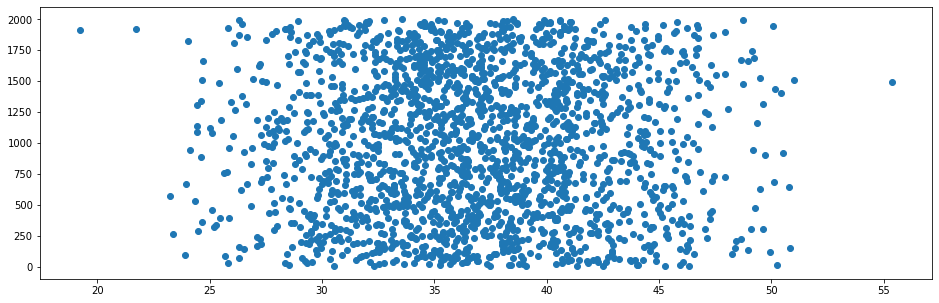

In [144]:
plt.figure(figsize=(16,5))
plt.scatter(mo['pasta_price'],mo["hh_id"])
plt.show()

In [145]:
area_code_income=pd.DataFrame(data.groupby("area_code")["yearly_income"].sum())
area_code_income

,yearly_income
area_code,
1,223489780
2,211323920
3,208071040
4,235836760
5,205123760


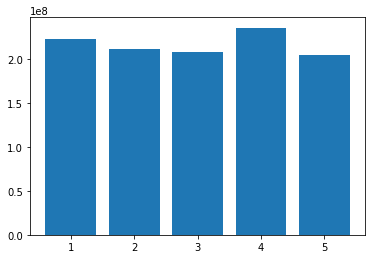

In [146]:
plt.bar([1,2,3,4,5],area_code_income['yearly_income'])
plt.show()

In [147]:
order_income=pd.DataFrame(data.groupby("area_code")["order_id"].count())
order_income

,order_id
area_code,
1,7960
2,8060
3,8040
4,8060
5,7880


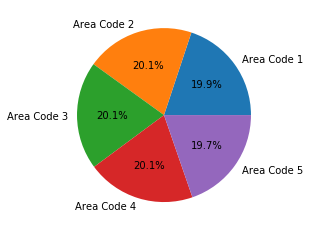

In [148]:
nofi=pd.DataFrame(order_income)
labels = 'Area Code 1', 'Area Code 2', 'Area Code 3', 'Area Code 4','Area Code 5'

plt.pie(nofi['order_id'], labels=labels,autopct='%1.1f%%')
plt.show()